### web crawling
- 1. requests : json : 동적페이지(URL 변경 없이 데이터를 수정 및 추가)
- 2. requests : html : 정적페이지(URL 변경으로 데이터를 수정 및 추가)
- 3. selenium : web browser : 1, 2번 방법을 사용하지 못할때 사용

### 1. 네이버 주식 데이터 크롤링
- 코스피 데이터 수집
- 코스닥 데이터 수집
- USD환율 데이터 수집
- 그래프 그리기
- 상관계수를 확인

#### 크롤링 절차
- 1. 웹서비스 분석 : URL 분석하기
- 2. request, response 하기 : json 얻기
- 3. 문자열 json 데이터를 dict로 변경(파싱) 후 데이터프레임으로 생성

In [1]:
import requests

In [20]:
# 1. 웹 서비스 분석 : URL
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code=KOSPI&pageSize=20&page=1"

In [21]:
# 2. request, response : JSON(str)
response = requests.get(url)
response

<Response [200]>

In [22]:
# 3. str 데이터를 dict로 파싱 후 데이터 프레임으로 만들기
datas = response.json()["result"]["siseList"]
type(datas), len(datas)

(list, 20)

In [23]:
kospi_df = pd.DataFrame(datas)
kospi_df.tail(3)

,cd,cr,cv,dt,hv,lv,ncv,ov
17,KOSPI,0.04,0.77,20191015,2073.21,2064.34,2068.17,2064.78
18,KOSPI,1.11,22.79,20191014,2075.10,2065.53,2067.40,2068.13
19,KOSPI,0.81,16.46,20191011,2053.94,2040.48,2044.61,2048.08


#### KOSDAQ 크롤링

In [24]:
# 1. 웹 페이지 분석 : URL
url = "https://m.stock.naver.com/api/json/sise/dailySiseIndexListJson.nhn?\
code=KOSDAQ&pageSize=20&page=1"

In [25]:
# 2. request, response : JSON
response = requests.get(url)
response

<Response [200]>

In [26]:
# 3. JSON(str) -> dict -> DataFrame
datas = response.json()["result"]["siseList"]
kosdaq_df = pd.DataFrame(datas)
kosdaq_df.tail(3)

,cd,cr,cv,dt,hv,lv,ncv,ov
17,KOSDAQ,0.83,5.34,20191015,647.40,641.49,646.80,641.51
18,KOSDAQ,1.34,8.51,20191014,643.41,637.69,641.46,638.65
19,KOSDAQ,-0.28,-1.78,20191011,638.49,632.92,632.95,638.22


#### USD 크롤링

In [29]:
# 1. 웹 페이지 분석 : URL
url = "https://m.stock.naver.com/api/json/marketindex/marketIndexDay.nhn?\
marketIndexCd=FX_USDKRW&pageSize=20&page=1"

In [30]:
# 2. request, response : JSON
response = requests.get(url)

In [31]:
# 3. JSON(str) -> dict -> DataFrame
datas = response.json()["result"]["marketIndexDay"]
usd_df = pd.DataFrame(datas)
usd_df.tail(1)

,cbv,cr,csv,cv,dt,nv,rv,sv
19,1206.75,-0.75,1165.25,-9.0,20191011,1186.0,1174.4,1197.6


In [32]:
len(kospi_df), len(kosdaq_df), len(usd_df)

(20, 20, 20)

#### 그래프로 그리기

In [35]:
%matplotlib inline

In [36]:
%config InlineBackend.figure_formats = {'png', 'retina'}

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

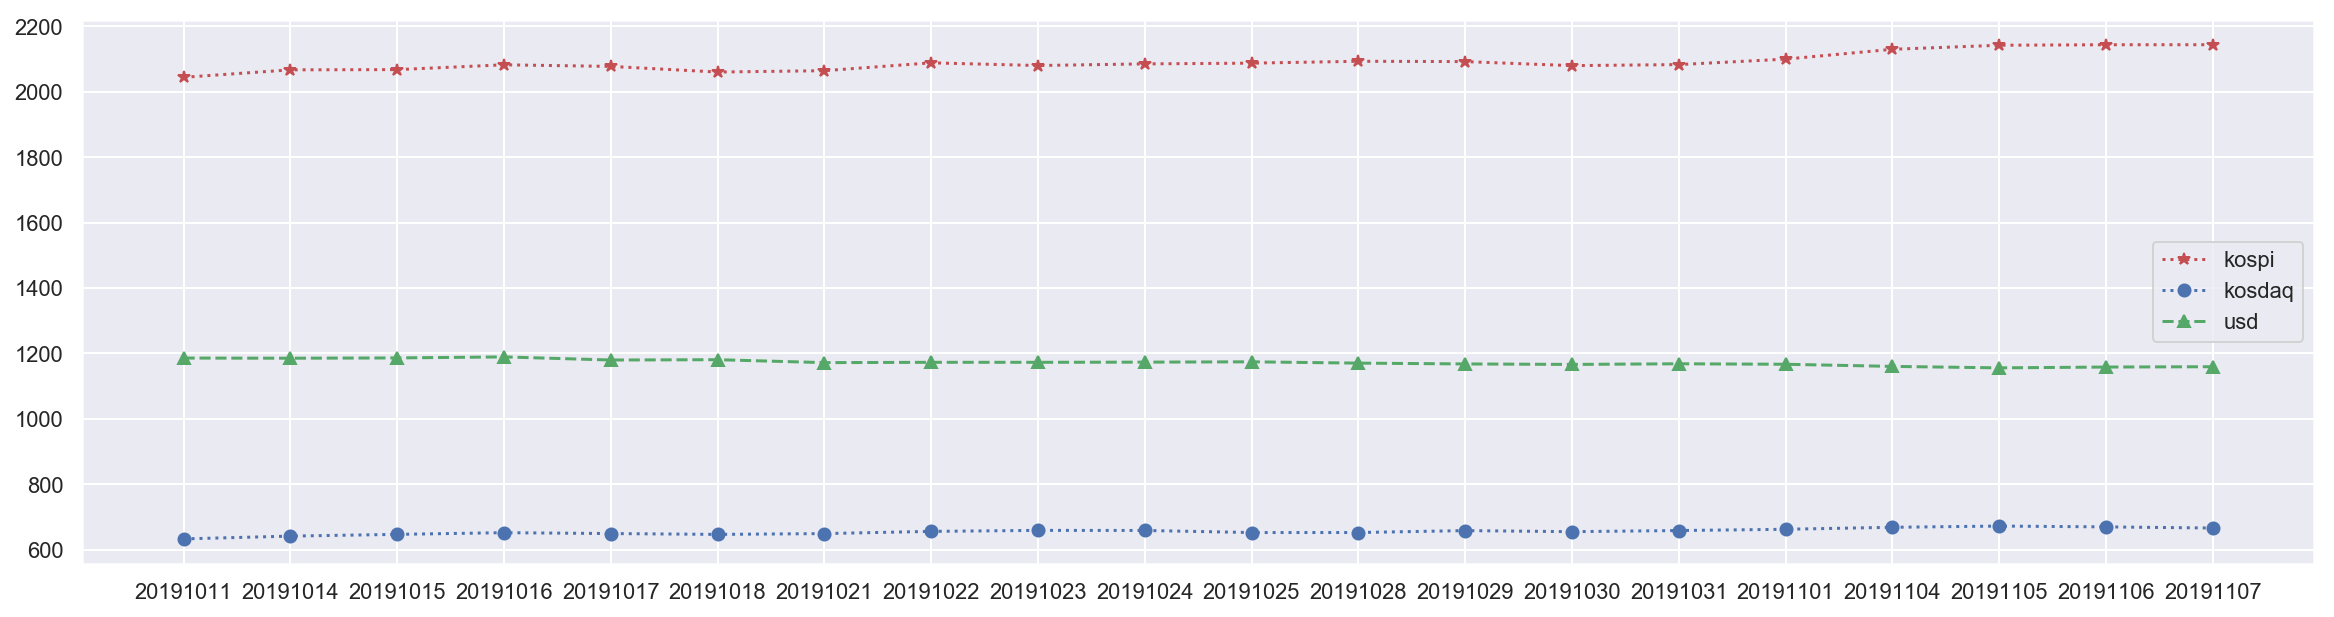

In [47]:
# 코스피, 코스닥, 환율 종가 데이터 그리기
plt.figure(figsize=(20, 5))

plt.plot(kospi_df[::-1]["dt"], kospi_df[::-1]["ncv"], "r*:", label="kospi")
plt.plot(kosdaq_df[::-1]["dt"], kosdaq_df[::-1]["ncv"], "bo:", label="kosdaq")
plt.plot(usd_df[::-1]["dt"], usd_df[::-1]["nv"], "g^--", label="usd")
plt.legend(loc=0)

plt.show()

In [45]:
usd_df.tail(1)

,cbv,cr,csv,cv,dt,nv,rv,sv
19,1206.75,-0.75,1165.25,-9.0,20191011,1186.0,1174.4,1197.6


#### 정규화 : Nomalization
- `z = (x - min(x)) / (max(x) - min(x))`

In [48]:
from sklearn import preprocessing

In [49]:
preprocessing.minmax_scale(kospi_df[::-1]["ncv"])

array([0.        , 0.22863162, 0.23635634, 0.38342697, 0.33436998,
       0.16131621, 0.20294944, 0.44392055, 0.36125602, 0.41181782,
       0.43418941, 0.49147271, 0.4823435 , 0.35774478, 0.38994783,
       0.55768459, 0.85904896, 0.98344703, 0.99859551, 1.        ])

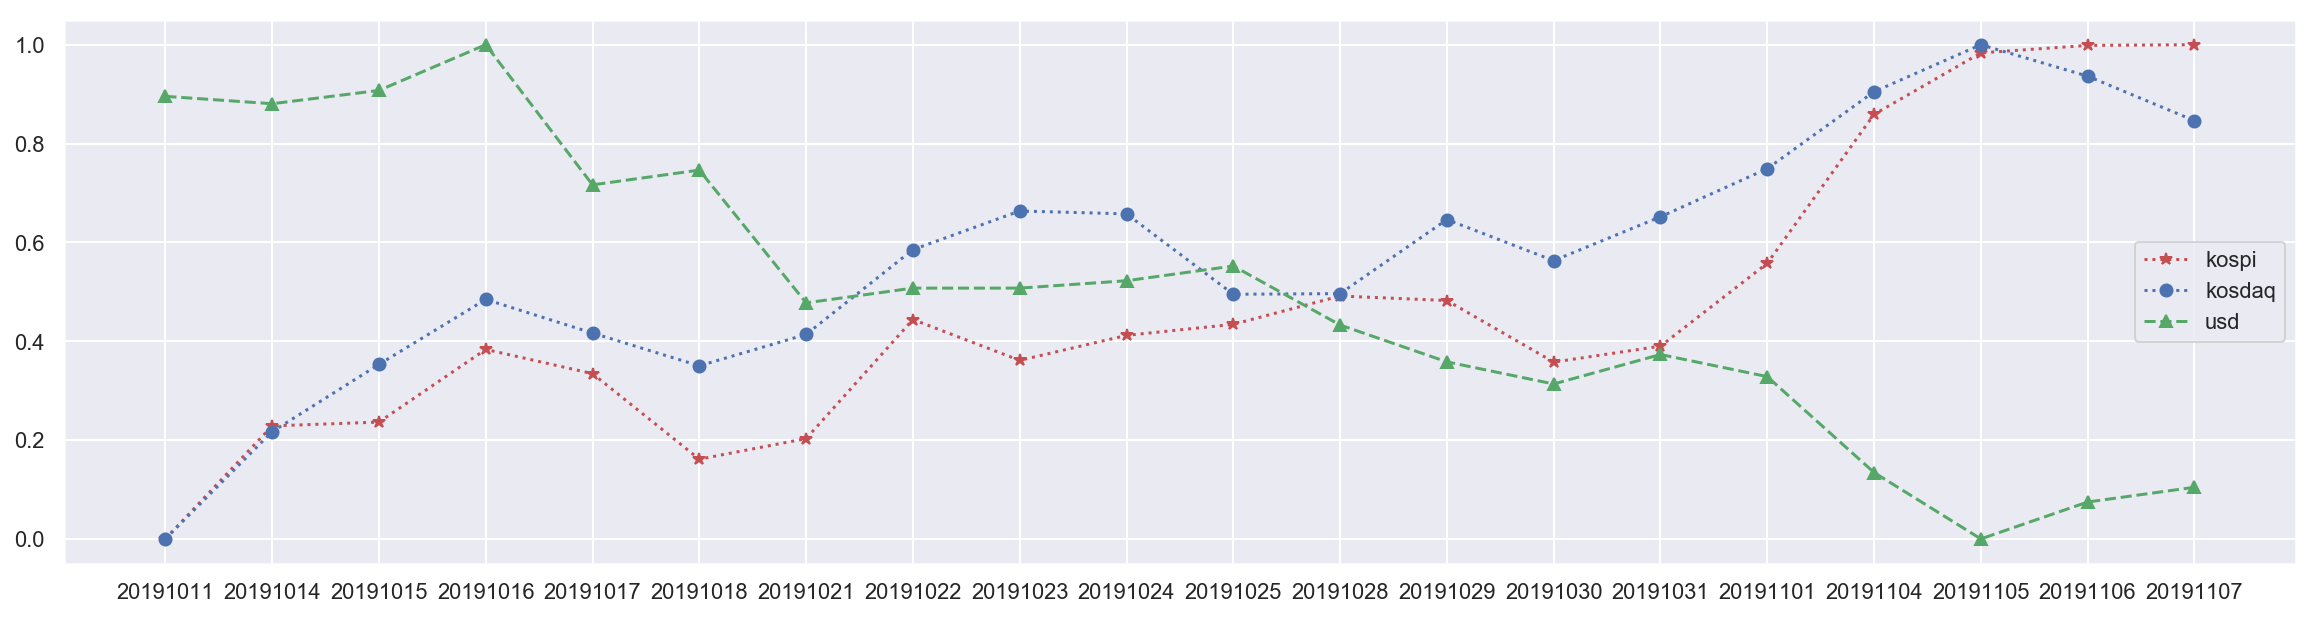

In [51]:
# 코스피, 코스닥, 환율 종가 데이터 그리기
plt.figure(figsize=(20, 5))

plt.plot(kospi_df[::-1]["dt"], 
         preprocessing.minmax_scale(kospi_df[::-1]["ncv"]), 
         "r*:", label="kospi")
plt.plot(kosdaq_df[::-1]["dt"], 
         preprocessing.minmax_scale(kosdaq_df[::-1]["ncv"]), 
         "bo:", label="kosdaq")
plt.plot(usd_df[::-1]["dt"], 
         preprocessing.minmax_scale(usd_df[::-1]["nv"]), 
         "g^--", label="usd")
plt.legend(loc=0)

plt.show()

In [52]:
import numpy as np

In [53]:
np.corrcoef(kospi_df["ncv"], kosdaq_df["ncv"])[0, 1]

0.9101026808848969

In [54]:
np.corrcoef(kospi_df["ncv"], usd_df["nv"])[0, 1]

-0.838926140662972

In [55]:
np.corrcoef(kosdaq_df["ncv"], usd_df["nv"])[0, 1]

-0.876222189145846